In [1]:
%run "../scripts/data_processing.py"
%run "../scripts/node_edge_generation.py"
%run "../scripts/graph_functions.py"

In [2]:
import pandas as pd
import scipy.io
import scanpy as sc

In [3]:
#Data path
datadir = os.path.abspath("../../Data/")

#Datasets
scRNA_data    = datadir+"/RNA_seq/E-GEOD-180759.aggregated_filtered_counts.mtx" 
scRNA_genes   = datadir+"/RNA_seq/E-GEOD-180759.aggregated_filtered_counts.mtx_rows" 
scRNA_barcodes= datadir+"/RNA_seq/E-GEOD-180759.aggregated_filtered_counts.mtx_cols" 

In [4]:
#Load data
matrix = scipy.io.mmread(scRNA_data).tocsc() 
genes    = pd.read_csv(scRNA_genes, header=None, sep="\t")
barcodes = pd.read_csv(scRNA_barcodes, header=None, sep="\t")

In [5]:
# Convert to AnnData format (used by Scanpy)
adata = sc.AnnData(X=matrix.transpose(), var=pd.DataFrame(genes[1].values, columns=["gene"]), obs=pd.DataFrame(barcodes[0].values, columns=["barcode"]))


/home/louie/miniconda3/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/louie/miniconda3/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [6]:
# Preprocessing
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# Normalize and log-transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# PCA and clustering
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

/home/louie/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: Please install the igraph package: `conda install -c conda-forge python-igraph` or `pip3 install igraph`.

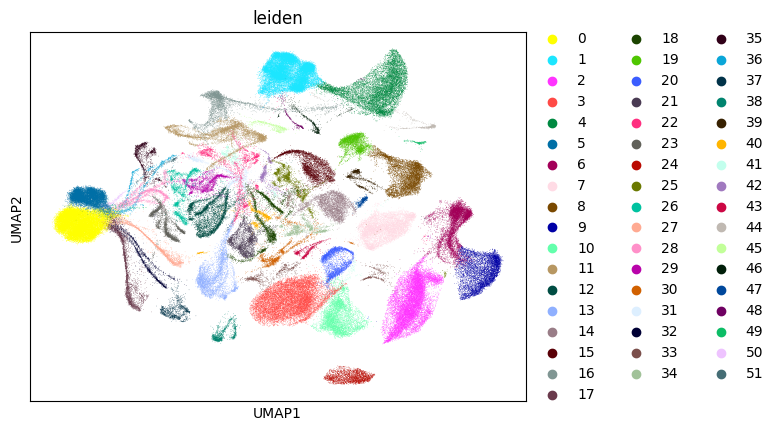

In [9]:
# Visualization
sc.tl.umap(adata)
sc.pl.umap(adata, color=["leiden"])

In [ ]:
print(matrix[:5, :5].toarray()) 

In [ ]:
df = pd.DataFrame(matrix[:5, :5].toarray(), index=barcodes[0][:5], columns=genes[1][:5])

In [ ]:
display(df)